**Handling data and performing data cleaning**

In [4]:
import pandas as pd

#loading the dataset in google colab
dataset_path = '/content/Stock Market-Historical Data of Top 10 Companies.csv'

# Loading the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Displaying the initial state of the dataset
print("Initial dataset:")
print(df.head())
# Checking for missing values
missing_values = df.isnull().sum()
# Displaying the number of missing values in each column
print("\nMissing values in each column:")
print(missing_values)

# Handle missing values
df_cleaned = df.fillna(df.mean())

# Display the cleaned dataset
print("\nCleaned dataset:")
print(df_cleaned.head())


Initial dataset:
  Company Close/Last    Volume     Open       High      Low
0    AAPL    $193.99  50520160  $191.90    $194.32  $191.81
1    AAPL    $190.69  41616240  $190.23  $191.1799  $189.63
2    AAPL    $190.54  41342340  $190.50    $191.19  $189.78
3    AAPL    $189.77  60750250  $189.68    $191.70  $188.47
4    AAPL    $188.08  46638120  $189.16    $189.30  $186.60

Missing values in each column:
Company       0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

Cleaned dataset:
  Company Close/Last    Volume     Open       High      Low
0    AAPL    $193.99  50520160  $191.90    $194.32  $191.81
1    AAPL    $190.69  41616240  $190.23  $191.1799  $189.63
2    AAPL    $190.54  41342340  $190.50    $191.19  $189.78
3    AAPL    $189.77  60750250  $189.68    $191.70  $188.47
4    AAPL    $188.08  46638120  $189.16    $189.30  $186.60


<ipython-input-4-09e8381ceeb4>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned = df.fillna(df.mean())


In [5]:
import pandas as pd

#loading the excel dataset
dataset_path = '/content/MF_Behavior.xlsx'

# Loading the dataset into a pandas DataFrame
df = pd.read_excel(dataset_path)

# Displaying the initial state of the dataset
print("Initial dataset:")
print(df.head())

# Checking for missing values
missing_values = df.isnull().sum()

# Displaying the number of missing values in each column
print("\nMissing values in each column:")
print(missing_values)

# Handling missing values (for simplicity, filling missing values with the mean)
df_cleaned = df.fillna(df.mean())

# Displaying the cleaned dataset
print("\nCleaned dataset:")
print(df_cleaned.head())


Initial dataset:
   Investor_ID  Longevity  Female  Age  Income  ProfManage  Diversification  \
0            1          1       0    1       1           1                2   
1            2          2       0    1       1           2                1   
2            3          8       0    2       1           0                1   
3            4          8       0    2       1           1                2   
4            5         18       0    3       1           2                0   

   Affordability  Liquidity  Growth  Trustworthiness  Technology  Integrity  \
0              6          4       3                3           5          2   
1              6          3       4                2           6          2   
2              7          5       3                3           3          4   
3              6          5       4                4           2          4   
4              7          7       3                6           0          6   

   BrandValue     AUM  
0        

**Reading the columns of the datasets**

In [6]:
import pandas as pd

# Reading the columns of the Stock Market dataset
stock_data = pd.read_csv('/content/Stock Market-Historical Data of Top 10 Companies.csv')
print("Columns of Stock Market dataset:")
print(stock_data.columns)

# Reading the columns of the MF_Behavior dataset
behavior_data = pd.read_excel('/content/MF_Behavior.xlsx')
print("\nColumns of MF_Behavior dataset:")
print(behavior_data.columns)


Columns of Stock Market dataset:
Index(['Company', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

Columns of MF_Behavior dataset:
Index(['Investor_ID', 'Longevity', 'Female', 'Age', 'Income', 'ProfManage',
       'Diversification', 'Affordability', 'Liquidity', 'Growth',
       'Trustworthiness', 'Technology', 'Integrity', 'BrandValue', 'AUM'],
      dtype='object')


**Random forest regression model**

Mean Squared Error: 9623771122.450775


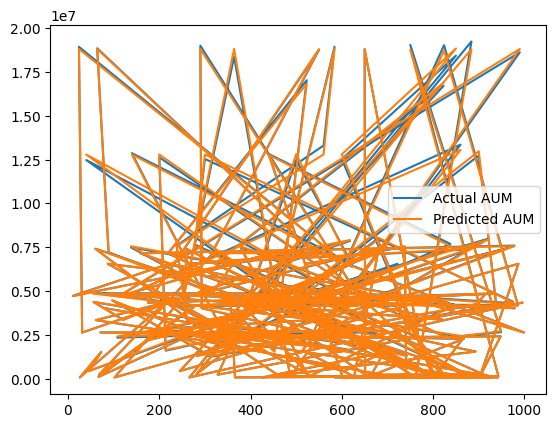

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/MF_Behavior.xlsx')
df = df.set_index('Investor_ID')
X = df.drop(['AUM'], axis=1)
y = df['AUM']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build and train a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predict on test data
y_pred = rf_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# plots
plt.plot(y_test.index, y_test, label='Actual AUM')
plt.plot(y_test.index, y_pred, label='Predicted AUM')
plt.legend()
plt.show()


**Regression Model for Correlation Studies**

Mean Squared Error: 2846936691156.8086
R^2 Score: 0.8761351422647697


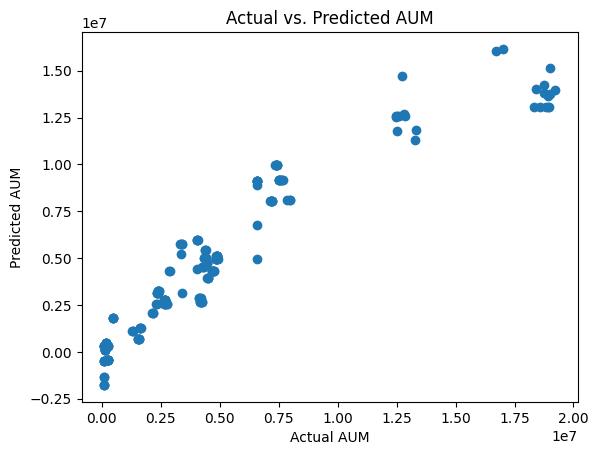

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_excel('/content/MF_Behavior.xlsx')
df = df.set_index('Investor_ID')
# Assuming you want to predict 'AUM' based on other features
# Replace 'AUM' with the target variable you are interested in
X = df.drop(['AUM'], axis=1)
y = df['AUM']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# Visualization of the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual AUM')
plt.ylabel('Predicted AUM')
plt.title('Actual vs. Predicted AUM')
plt.show()


**Time series analysis and hypothesis testing**

In [9]:
import statsmodels.api as sm
# Selecting features and target variable
features = ['Longevity', 'Female', 'Age', 'Income', 'ProfManage', 'Diversification',
            'Affordability', 'Liquidity', 'Growth', 'Trustworthiness', 'Technology',
            'Integrity', 'BrandValue']
target = 'AUM'
X = df[features]
y = df[target]
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training a linear regression model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# Displaying model evaluation results
print(f'Mean Squared Error: {mse}')
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)
# Hypothesis testing using statsmodels
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

Mean Squared Error: 2846936691156.8086
            Feature   Coefficient
0         Longevity  3.323931e+05
1            Female -4.400684e+05
2               Age  6.949502e+05
3            Income  2.574281e+06
4        ProfManage  2.437515e+05
5   Diversification  3.675460e+05
6     Affordability  1.265962e+06
7         Liquidity -6.446150e+05
8            Growth  1.859462e+05
9   Trustworthiness  3.884825e+05
10       Technology  4.306308e+05
11        Integrity  9.718941e+04
12       BrandValue -5.439152e+05
                            OLS Regression Results                            
Dep. Variable:                    AUM   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     483.8
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:28:02   Log-Likelihood:                -12424.
No. Observa

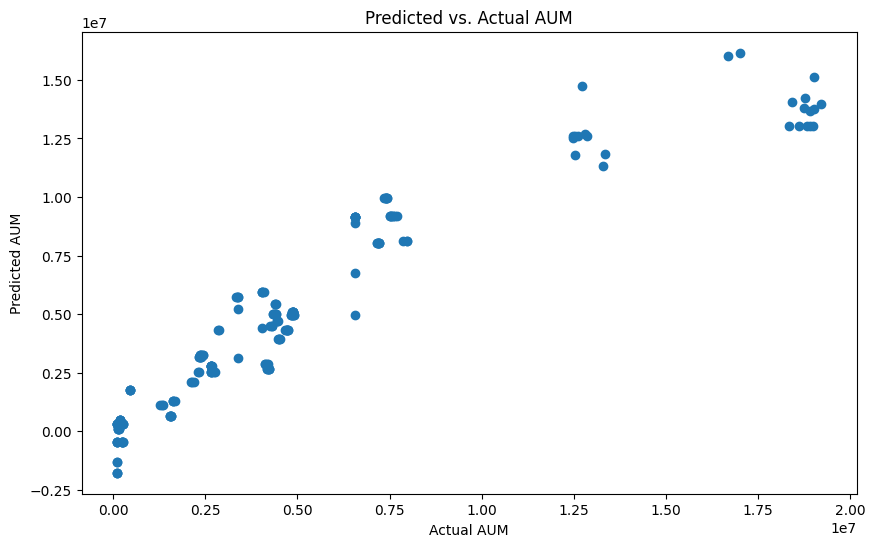

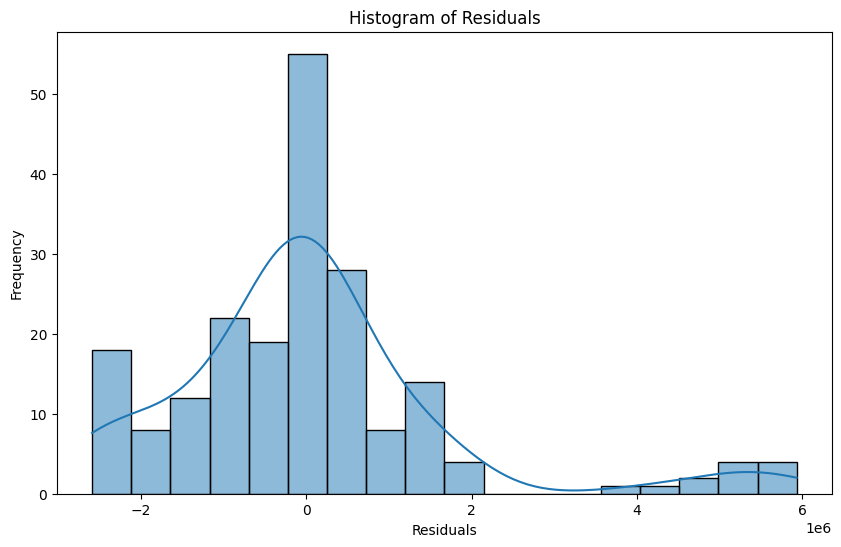

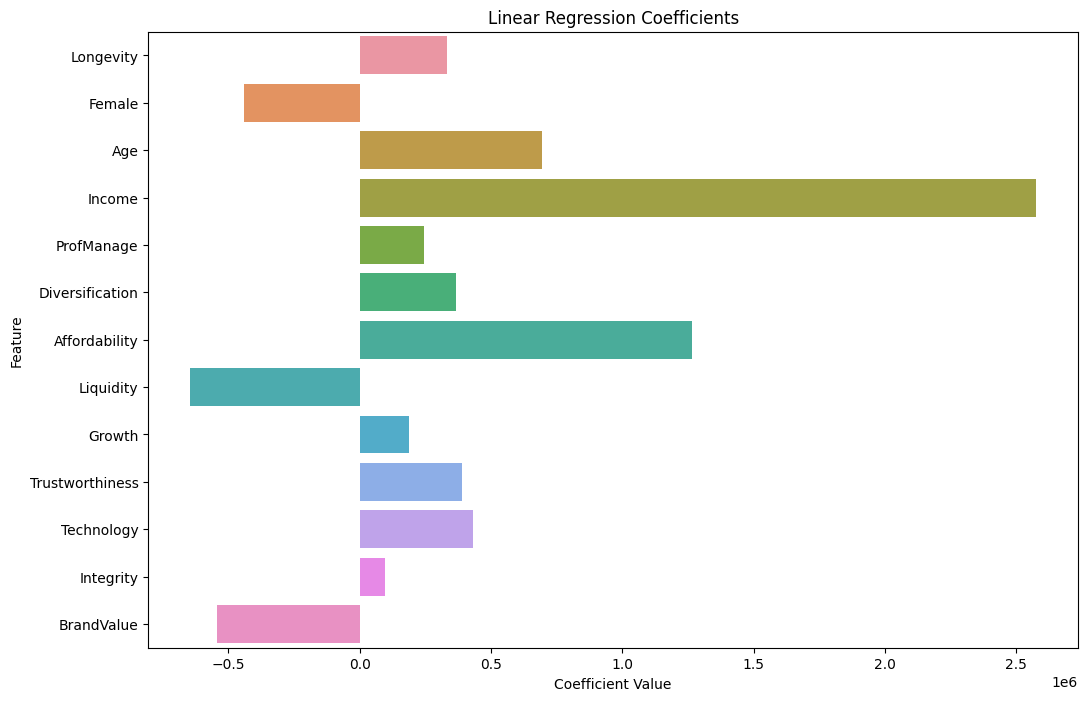

In [10]:
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual AUM')
plt.ylabel('Predicted AUM')
plt.title('Predicted vs. Actual AUM')
plt.show()
# Plotting histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
# Bar chart of coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


**Support Vector Machines (SVM)**

Mean Squared Error: 25249146232039.78
R^2 Score: -0.09854283577230794


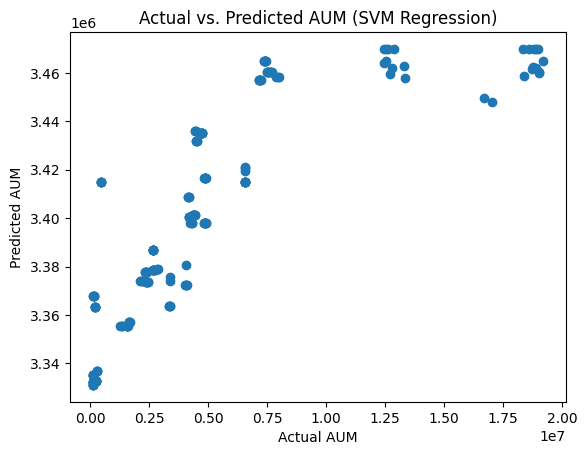

In [11]:
from sklearn.svm import SVR
X = df.drop(['AUM'], axis=1)
y = df['AUM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual AUM')
plt.ylabel('Predicted AUM')
plt.title('Actual vs. Predicted AUM (SVM Regression)')
plt.show()

**Gaussian Process Regresssion**

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Mean Squared Error: 24154005972.33

Regression Coefficients:
Longevity: 6.907755278982137

Feature Importance:
Longevity: 1.0


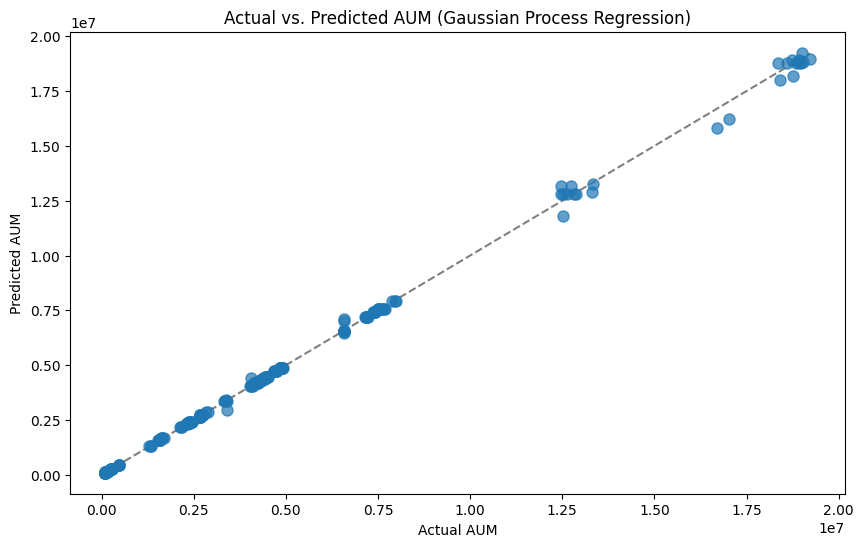

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


features = ['Longevity', 'Female', 'Age', 'Income', 'ProfManage', 'Diversification',
            'Affordability', 'Liquidity', 'Growth', 'Trustworthiness', 'Technology',
            'Integrity', 'BrandValue']
target = 'AUM'
X = df[features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
model.fit(X_train, y_train)
y_pred, sigma = model.predict(X_test, return_std=True)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print("\nRegression Coefficients:")
for feature, coef in zip(features, model.kernel_.theta[:-1]):
    print(f"{feature}: {coef}")
print("\nFeature Importance:")
feature_importance = np.abs(model.kernel_.theta[:-1])
feature_importance /= feature_importance.sum()
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance}")
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_pred, yerr=1.96 * sigma, fmt='o', ecolor='red', markersize=8, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')
plt.xlabel('Actual AUM')
plt.ylabel('Predicted AUM')
plt.title('Actual vs. Predicted AUM (Gaussian Process Regression)')
plt.show()


**Naive Bayes Regresssion**

Mean Squared Error: 1507089733952.845


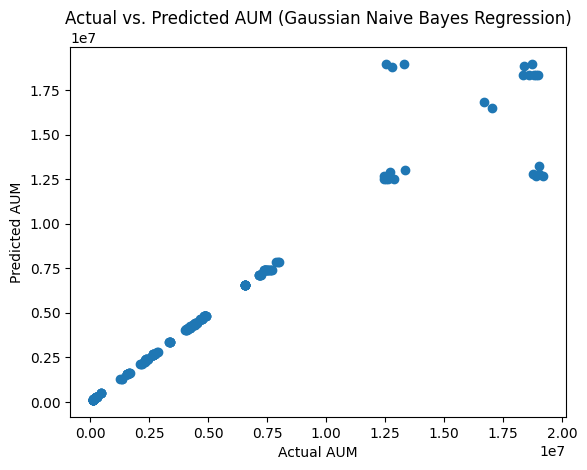

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
features = ['Longevity', 'Female', 'Age', 'Income', 'ProfManage', 'Diversification',
            'Affordability', 'Liquidity', 'Growth', 'Trustworthiness', 'Technology',
            'Integrity', 'BrandValue']
target = 'AUM'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual AUM')
plt.ylabel('Predicted AUM')
plt.title('Actual vs. Predicted AUM (Gaussian Naive Bayes Regression)')
plt.show()


**Decision Tree Regression**

Mean Squared Error: 11419955625.398727


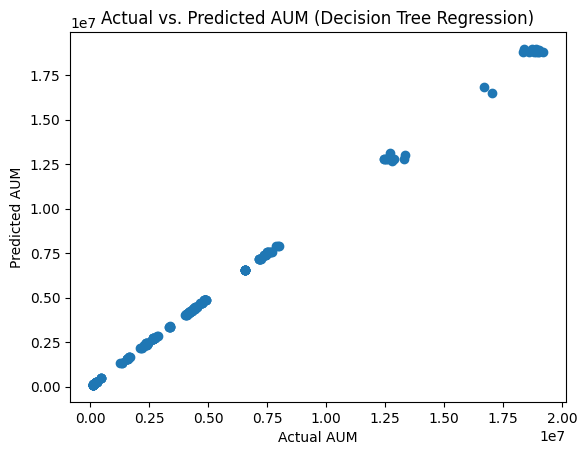

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
features = ['Longevity', 'Female', 'Age', 'Income', 'ProfManage', 'Diversification',
            'Affordability', 'Liquidity', 'Growth', 'Trustworthiness', 'Technology',
            'Integrity', 'BrandValue']
target = 'AUM'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual AUM')
plt.ylabel('Predicted AUM')
plt.title('Actual vs. Predicted AUM (Decision Tree Regression)')
plt.show()


In [15]:
import pandas as pd
df = pd.read_excel("/content/MF_Behavior.xlsx")
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['Investor_ID', 'Longevity', 'Female', 'Age', 'Income', 'ProfManage',
       'Diversification', 'Affordability', 'Liquidity', 'Growth',
       'Trustworthiness', 'Technology', 'Integrity', 'BrandValue', 'AUM'],
      dtype='object')


**MAXIMUM LIKELIHOOD MODEL**

In [ ]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_excel("/content/MF_Behavior.xlsx")
dependent_variable_column = 'Longevity'
independent_variable_columns = ['Female', 'Age', 'Income', 'ProfManage',
                                 'Diversification', 'Affordability', 'Liquidity',
                                 'Growth', 'Trustworthiness', 'Technology',
                                 'Integrity', 'BrandValue', 'AUM']
X = sm.add_constant(df[independent_variable_columns])
model = sm.OLS(df[dependent_variable_column], X)
result = model.fit()

# Display the results
print(result.summary())

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_excel("/content/MF_Behavior.xlsx")
# Define the actual column names
dependent_variable_column = 'Longevity'
independent_variable_columns = ['Female', 'Age', 'Income', 'ProfManage',
                                 'Diversification', 'Affordability', 'Liquidity',
                                 'Growth', 'Trustworthiness', 'Technology',
                                 'Integrity', 'BrandValue', 'AUM']
X = sm.add_constant(df[independent_variable_columns])
model = sm.OLS(df[dependent_variable_column], X)
result = model.fit()
plt.scatter(df[dependent_variable_column], result.fittedvalues)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs. Predicted Values')
plt.show()
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()
